In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("house_price_dataset_800.csv")
df

,area_sqft,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,price
0,961,1,3,2,2,yes,no,no,no,no,440583.29
1,1166,5,2,1,2,yes,yes,no,yes,yes,678002.08
2,795,1,2,2,2,no,no,no,no,yes,334415.37
3,1468,5,1,1,2,no,no,yes,yes,yes,575596.28
4,3089,5,2,1,0,no,no,no,no,yes,505591.14
...,...,...,...,...,...,...,...,...,...,...,...
795,3768,4,1,1,1,no,no,yes,no,yes,424680.35
796,3526,5,3,2,0,no,no,no,no,yes,599067.07
797,1750,1,1,1,0,no,no,no,yes,yes,293935.60
798,2896,3,3,2,0,yes,no,yes,yes,no,583430.77


In [3]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i]) 
df

,area_sqft,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,price
0,961,1,3,2,2,1,0,0,0,0,440583.29
1,1166,5,2,1,2,1,1,0,1,1,678002.08
2,795,1,2,2,2,0,0,0,0,1,334415.37
3,1468,5,1,1,2,0,0,1,1,1,575596.28
4,3089,5,2,1,0,0,0,0,0,1,505591.14
...,...,...,...,...,...,...,...,...,...,...,...
795,3768,4,1,1,1,0,0,1,0,1,424680.35
796,3526,5,3,2,0,0,0,0,0,1,599067.07
797,1750,1,1,1,0,0,0,0,1,1,293935.60
798,2896,3,3,2,0,1,0,1,1,0,583430.77


In [4]:
x=df.drop("price",axis=1) #features
y=df["price"] # target


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [7]:
y_pred=model.predict(x_test)
y_pred

array([385500.04, 399324.55, 453495.88, 207912.91, 411992.05, 442297.47,
       441412.56, 255842.13, 507492.55, 382604.51, 204469.9 , 668942.48,
       465813.82, 620563.45, 669715.04, 766405.84, 539471.57, 279490.3 ,
       560769.53, 470679.22, 472302.62, 620563.45, 477934.36, 327085.09,
       603257.14, 344874.26, 526627.94, 379295.48, 511073.36, 600429.81,
       724912.86, 350349.69, 565812.24, 327035.49, 409320.13, 440622.36,
       406907.27, 570074.37, 620563.45, 608757.01, 726211.78, 341935.49,
       508716.55, 559759.11, 496763.34, 311602.73, 432892.75, 628456.77,
       551052.9 , 616091.45, 461012.55, 552725.26, 539058.19, 539764.72,
       643147.14, 526965.42, 432892.75, 578176.26, 643147.14, 416785.55,
       472685.44, 507967.03, 409320.13, 470461.74, 629875.88, 320901.77,
       408905.1 , 364572.46, 523948.04, 507850.17, 591792.67, 311602.73,
       375849.28, 544606.28, 339937.33, 440783.62, 726211.78, 454711.78,
       622556.84, 375009.45, 339312.56, 553826.92, 

In [8]:
mse=mean_squared_error(y_test,y_pred)
print(f'mean Squared Error:{mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error:{rmse}')

mean Squared Error:3272775148.897287
Root Mean Squared Error:57208.17379446128


In [9]:
score=r2_score(y_test,y_pred)
score

0.7552250629024009

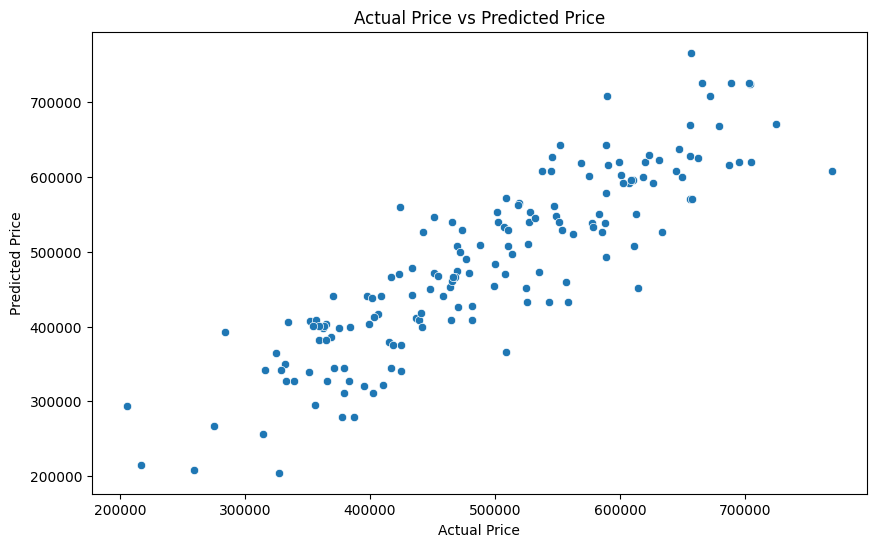

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [11]:
new_data=pd.DataFrame({
"area_sqft":1000,
"bedrooms":4,
"bathrooms":2,
"stories":2,
"parking":2,
"mainroad":label.fit_transform(["no"]),
"guestroom":label.fit_transform(["no"]),
"basement":label.fit_transform(["no"]),
"airconditioning":label.fit_transform(["no"]),
"prefarea":label.fit_transform(["no"]),
})
predict=model.predict(new_data)
predict

array([339937.33])